In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [30]:
Anor = pd.read_csv("data/Anorexia.dat", sep="\s+")
Anor.head(3)

,subject,therapy,before,after
0,1,cb,80.5,82.2
1,2,cb,84.9,85.6
2,3,cb,81.5,81.4


In [31]:
change = Anor["after"] - Anor["before"]
Anor["change"] = change  # add new variable to the data frame
Anor.loc[Anor["therapy"] == "cb"]["change"].describe()

count    29.000000
mean      3.006897
std       7.308504
min      -9.100000
25%      -0.700000
50%       1.400000
75%       3.900000
max      20.900000
Name: change, dtype: float64

Text(0, 0.5, 'Frequency')

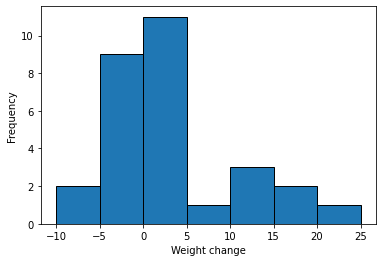

In [32]:
bins = list(range(-10, 30, 5))
plt.hist(Anor.loc[Anor["therapy"] == "cb"]["change"], bins, edgecolor="k")
plt.xlabel("Weight change")
plt.ylabel("Frequency")

In [33]:
changeCB = Anor.loc[Anor["therapy"] == "cb"]["change"]

In [34]:
import statsmodels.stats.api as sms

sms.DescrStatsW(changeCB).tconfint_mean()

(0.2268901583587768, 5.7869029450894995)

In [35]:
sms.DescrStatsW(changeCB).tconfint_mean(alpha=0.01)

(-0.7432794440477513, 6.757072547496028)

In [36]:
Anor

,subject,therapy,before,after,change
0,1,cb,80.5,82.2,1.7
1,2,cb,84.9,85.6,0.7
2,3,cb,81.5,81.4,-0.1
3,4,cb,82.6,81.9,-0.7
4,5,cb,79.9,76.4,-3.5
...,...,...,...,...,...
67,68,c,84.4,84.7,0.3
68,69,c,79.6,81.4,1.8
69,70,c,77.5,81.2,3.7
70,71,c,72.3,88.2,15.9


In [37]:
# Confidence Intervals Comparing Means and Comparing Pro- portions

In [38]:
from scipy.stats import t


def t2ind_confint(y1, y2, equal_var=True, alpha=0.05):

    # y1, y2 : vectors or data frames of values for group A and B
    # returns: mean_diff: mean(A)-mean(B) (float)
    # confint: CI for mu_A - mu_B (1d ndarray)
    # conf: confidence level of the CI (float)
    # df (float)
    n1 = len(y1)
    n2 = len(y2)
    var1 = np.var(y1) * n1 / (n1 - 1)
    var2 = np.var(y2) * n2 / (n2 - 1)
    if equal_var:
        df = n1 + n2 - 2
        vardiff = (
            ((n1 - 1) * var1 + (n2 - 1) * var2)
            / (n1 + n2 - 2)
            * (1 / n1 + 1 / n2)
        )
    else:
        df = (var1 / n1 + var2 / n2) ** 2 / (
            var1**2 / (n1**2 * (n1 - 1)) + var2**2 / (n2**2 * (n2 - 1))
        )
        vardiff = var1 / n1 + var2 / n2
    se = np.sqrt(vardiff)
    qt = t.ppf(1 - alpha / 2, df)  # t quantile for 100(1-alpha)% CI
    mean_diff = np.mean(y1) - np.mean(y2)
    confint = mean_diff + np.array([-1, 1]) * qt * se
    conf = 1 - alpha
    return mean_diff, confint, conf, df


# returns: mean(A) - mean(B), CI for mu_A - mu_B, confidence level, df

In [39]:
import pandas as pd

# Anor = pd.read_csv('http://stat4ds.rwth-aachen.de/data/Anorexia.dat', sep='\s+')
cogbehav = Anor.loc[Anor["therapy"] == "cb"]["change"]
control = Anor.loc[Anor["therapy"] == "c"]["change"]
mean_diff, confint, conf, df = t2ind_confint(
    cogbehav, control
)  # call the function above
print("mean1-mean2 =", mean_diff)  # assume equal variances
print(conf, "CI:", confint)
print("df =", df)

mean1-mean2 = 3.456896551724137
0.95 CI: [-0.68013704  7.59393014]
df = 53


In [40]:
mean_diff, confint, conf, df = t2ind_confint(
    cogbehav, control, equal_var=False
)  # permit unequal variances
print("mean1-mean2 =", mean_diff)
print(conf, "CI:", confint)
print("df =", df)

mean1-mean2 = 3.456896551724137
0.95 CI: [-0.70446319  7.61825629]
df = 50.97065330426786


In [41]:
def prop2_confint(y1, n1, y2, n2, alpha=0.05):
    # y1, y2 : Number of successes in group A and B (int)
    # n1, n2 : Number of trials in group A and B (int)
    # returns: prop_diff for A-B (float), comfint (1d ndarray)

    prop1 = y1 / n1
    prop2 = y2 / n2
    var = prop1 * (1 - prop1) / n1 + prop2 * (1 - prop2) / n2
    se = np.sqrt(var)
    qz = norm.ppf(1 - alpha / 2)  # standard normal quantile

    prop_diff = prop1 - prop2
    confint = prop_diff + np.array([-1, 1]) * qz * se
    conf = 1 - alpha
    return prop_diff, confint, conf  # returns diff, CI, level

In [42]:
# call the function for data on prayers and coronary surgery:
prop_diff, confint, conf = prop2_confint(315, 604, 304, 597)
print("prop1-prop2 =", prop_diff)
print(conf, "CI:", confint)

prop1-prop2 = 0.012310448489689096
0.95 CI: [-0.04421536  0.06883625]
